### Setup and Load Data ###

In [1]:
run ../initialize.ipynb

Lax Version : 1.5.2


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
mpl.rcParams['axes.linewidth'] = 2.5
R_tpc=pax_config['DEFAULT']['tpc_radius']

In [3]:
def get_file_list(path, pattern, remove_string='', remove_path=True):
    '''
    Get a list of files matching pattern in path. Optional to remove a part of the path (i.e. the extention)
    Optional to remove the path
    '''
    file_list = glob.glob(path + pattern)
    # Remove path
    for i, f in enumerate(file_list):
        if remove_path:
            f = f.replace(path, '')
        if remove_string != '':
            f = f.replace(remove_string, '')
        file_list[i] = f
    file_list = np.sort(file_list)
    return file_list


### Extract Hist from pre-processed pickles: SR0

In [4]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun0'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']

Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 1390 rows removed (4.86% passed)
Source in place selection: 559 rows removed (61.74% passed)
Source in place selection: 1372 rows removed (6.09% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [5]:
%%time
print('Radon Data')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

  0%|          | 0/3450 [00:00<?, ?it/s]

Radon Data
Found 3450 datasets


100%|██████████| 3450/3450 [02:28<00:00, 23.27it/s]

CPU times: user 13.9 s, sys: 16.8 s, total: 30.6 s
Wall time: 2min 28s


In [6]:
dict_source_sr0={'Radon' : dicts_datasets_rn, 'Background' : dicts_datasets_bkg, 'Krypton': dicts_datasets_kr,}
for source, dict_data in dict_source_sr0.items():
    print(source, len(dict_data))

Krypton 75
Background 901
Radon 69


### Extract Hist from pre-processed pickles: SR1

In [7]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']


Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 7229 rows removed (4.56% passed)
Source in place selection: 1185 rows removed (84.35% passed)
Source in place selection: 7119 rows removed (6.01% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [8]:
%%time
print('Radon Data')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

  2%|▏         | 60/3454 [00:00<00:05, 589.90it/s]

Radon Data
Found 3454 datasets


100%|██████████| 3454/3454 [05:28<00:00, 10.53it/s] 

CPU times: user 29.9 s, sys: 37.4 s, total: 1min 7s
Wall time: 5min 28s


In [9]:
dict_source_sr1={'Radon' : dicts_datasets_rn, 'Krypton': dicts_datasets_kr, 'Background' : dicts_datasets_bkg}
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))

Krypton 221
Background 1969
Radon 200


### Time Distribution

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
100%|██████████| 75/75 [00:00<00:00, 3742.60it/s]

Krypton
Source in place selection: 19172 rows removed (7.58% passed)
Background



/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 47%|████▋     | 422/901 [00:00<00:00, 4217.58it/s]

Source in place selection: 6899 rows removed (66.74% passed)


100%|██████████| 69/69 [00:00<00:00, 3092.09it/s]

Radon
Source in place selection: 19315 rows removed (6.89% passed)



100%|██████████| 221/221 [00:00<00:00, 3767.64it/s]


Krypton
Source in place selection: 19172 rows removed (7.58% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 18%|█▊        | 358/1969 [00:00<00:00, 3572.63it/s]

Background
Source in place selection: 6899 rows removed (66.74% passed)


100%|██████████| 200/200 [00:00<00:00, 6303.72it/s]


Radon
Source in place selection: 19315 rows removed (6.89% passed)


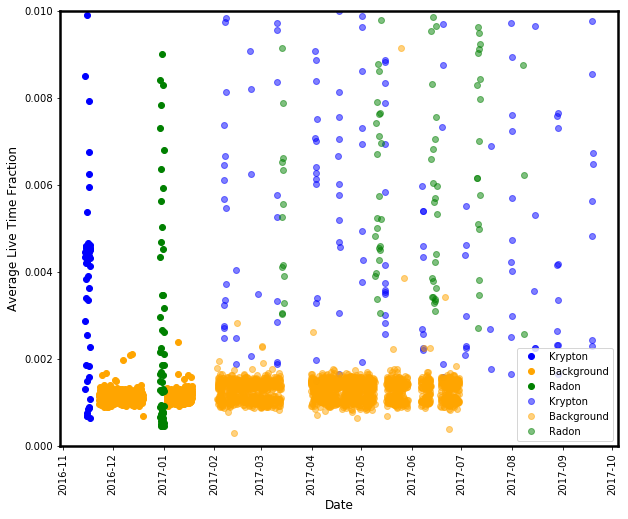

In [12]:
# Plots average lifetime over a run, versus run number

#plt.figure(figsize=(10, 8))
source_key={'Radon': 'Rn220', 'Krypton': 'Kr83m', 'Background': 'none'}
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
source_dfs_sr0={}
source_dfs_sr1={}

for source, dict_data in dict_source_sr0.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events=data['events']

        new_hist=livet_hist.sum('s2_area')
        new_hist=new_hist/events
            
        average_array.append(np.average(new_hist[:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
                
    #plt.xlabel('Time Since S2 [ns]', fontsize=12)
    #plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
    #plt.xlim([_xmin, _xmax])
    #plt.savefig("fig_%s_reduced_livet.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_reduced_livet.pdf" %source, bboxes='tight')
    #plt.show()
    
    source_dfs_sr0[source]=test_df

livet_hist=0
events=0   
for source, dict_data in dict_source_sr1.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events=data['events']

        new_hist=livet_hist.sum('s2_area')
        new_hist=new_hist/events
            
        average_array.append(np.average(new_hist[:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
                
    #plt.xlabel('Time Since S2 [ns]', fontsize=12)
    #plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
    #plt.xlim([_xmin, _xmax])
    #plt.savefig("fig_%s_reduced_livet.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_reduced_livet.pdf" %source, bboxes='tight')
    #plt.show()
    
    source_dfs_sr1[source]=test_df

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['start'], df['average_livetime'], marker='o', linewidth=0, color=colours[index], label=key)
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['start'], df['average_livetime'], marker='o', linewidth=0, color=colours[index], label=key, alpha =0.5)
    index+=1
plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 3), datetime.date(2017, 2, 6)])
plt.ylim([0, 0.01])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


###  Livetime - all events

Background
2479736
Krypton
2822859
Radon
2195232
Background
6006306
Krypton
7098741
Radon
11470115


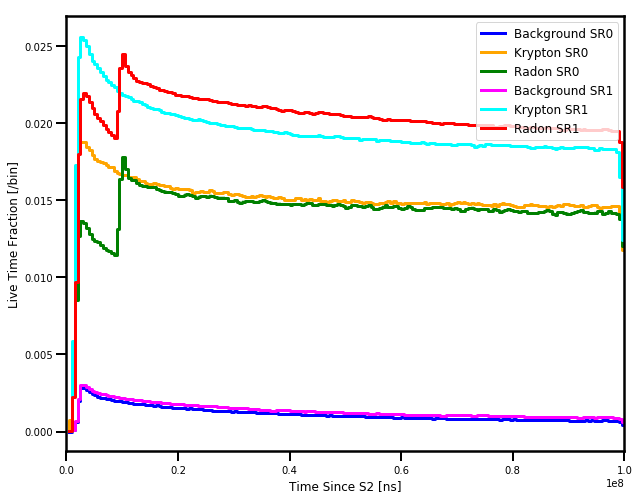

In [66]:
#Plots Live Time Fraction#

plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Blues")
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)


plt.xlim([0, _xmax])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_livet_example.png", bboxes='tight')
#plt.savefig("fig_livet_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Uncorrected Peak Rate

Background
2479736
Krypton
2822859
Radon
2195232
Background
6006306
Krypton
7098741
Radon
11470115


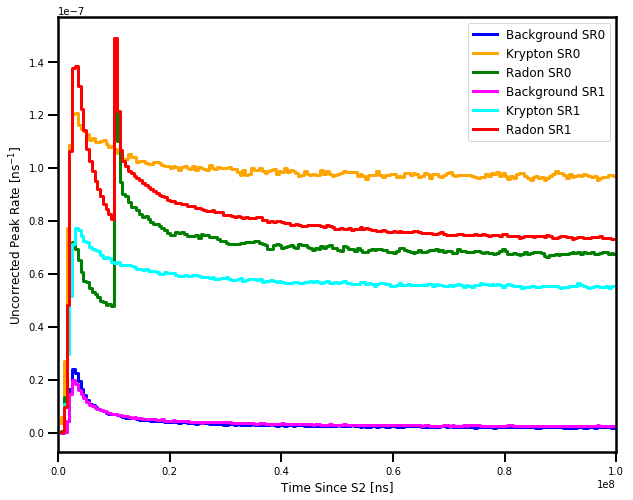

In [67]:
#Plots uncorrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0
plt.set_cmap("Blues")
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([0, window_length])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Uncorrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

In [86]:
dict_source_sr0_nocut=dict_source_sr0
dict_source_sr1_nocut=dict_source_sr1

### Live Time Corrected Peak Rate

Background
3265900
Krypton
4437917
Radon
2861216
Background
2479736
Krypton
3360928
Radon
2195232


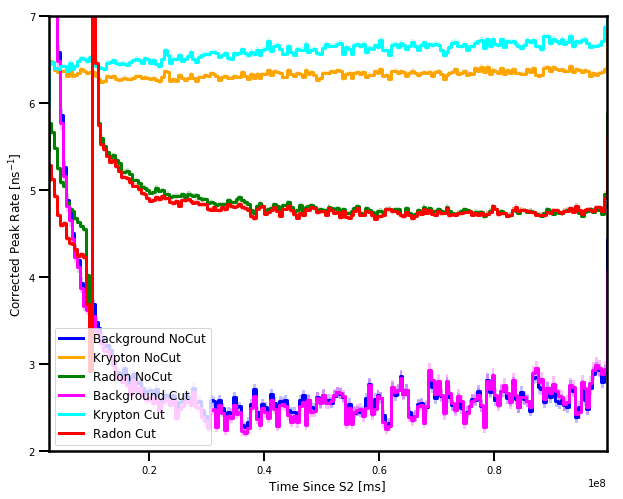

In [98]:
#Plots corrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0_nocut.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' NoCut')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' Cut')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([2, 7])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Questions:
    
 1.) Why Kr_SR0 higher than Kr_SR1? Probably event rate related. Look at individual calibrations. Should decrease with Kr source strength. If so, need some kind of cut to remove peaks from other events.
 
 2.)Why is Rn_SR0 higher than Rn_SR1. Source has not changed in activity signficantly. Injection procedure might have changed however. Could be lower overall event rate in SR1 if Kr explanation from (1) holds. Simple to check event rate.
 
 3.) Might be different "decay" tmes in SR0 and SR1 background. Could be bacground related? More alpha backgrounds in SR0 possibly. Check individual energy lines to be sure
 
Update:

After applying AFT cut:

 1.) . Kr still processing

 2.) Radon SR0 is now lower than Radon SR1, and more pronounced decay. Lower overall rate due to lower e-lifetime. Checks out.
 
 3.) Background more or less equivalent still, though higher rate at small times, posisbly due to higher extraction field and thsu charge yield.

### Split By Date of Krypton Dataset

  * If peak rate is related to event rate, should see decreasing peak rate trend in Krypton data

In [14]:
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']

In [107]:
%%time

kr_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 2, 10), datetime.date(2017, 2, 17), 
              datetime.date(2017, 2, 24), datetime.date(2017, 3, 3), datetime.date(2017, 3, 10), 
              datetime.date(2017, 3, 20), datetime.date(2017, 4, 7), datetime.date(2017, 4, 20)]

date_label=["5 Feb", "12 Feb", "21 Feb", "26 Feb", "5 Mar", "9 Mar",  "2 April", "16 April"]
print('Load Data')
simpath= '/project/lgrandi/jpienaar/cache_files/'
#simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_kr_calibrations={}
for t_index, date in enumerate(kr_cal_dates[:-1]):
    df=datasets_kr
    df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_kr_calibrations[date_label[t_index]]=dict_calibration

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 10%|▉         | 336/3478 [00:00<00:00, 3357.34it/s]

Load Data
Found 3478 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 426 rows removed (6.37% passed)


 10%|█         | 357/3478 [00:00<00:00, 3563.77it/s]

TimeCut Low selection: 29 rows removed (93.63% passed)
TimeCut High selection: 411 rows removed (3.52% passed)


 10%|▉         | 346/3478 [00:00<00:00, 3454.41it/s]

TimeCut Low selection: 44 rows removed (90.33% passed)
TimeCut High selection: 394 rows removed (4.14% passed)


 10%|▉         | 347/3478 [00:00<00:00, 3462.47it/s]

TimeCut Low selection: 61 rows removed (86.59% passed)
TimeCut High selection: 378 rows removed (4.06% passed)


  7%|▋         | 247/3478 [00:00<00:01, 2468.10it/s]

TimeCut Low selection: 77 rows removed (83.08% passed)
TimeCut High selection: 363 rows removed (3.97% passed)


  7%|▋         | 257/3478 [00:00<00:01, 2562.02it/s]

TimeCut Low selection: 92 rows removed (79.78% passed)
TimeCut High selection: 347 rows removed (4.41% passed)


 12%|█▏        | 434/3478 [00:00<00:00, 4338.48it/s]

TimeCut Low selection: 108 rows removed (76.26% passed)
TimeCut High selection: 328 rows removed (5.48% passed)


 24%|██▍       | 827/3478 [00:00<00:00, 4127.38it/s]

TimeCut Low selection: 127 rows removed (72.09% passed)
TimeCut High selection: 310 rows removed (5.49% passed)


100%|██████████| 3478/3478 [00:04<00:00, 814.57it/s] 

CPU times: user 8.7 s, sys: 1.13 s, total: 9.83 s
Wall time: 39.5 s


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


2017-01-17 2017-02-10
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 133 rows removed (13.07% passed)
2017-02-10 2017-03-20
TimeCut Low selection: 20 rows removed (86.93% passed)
TimeCut High selection: 124 rows removed (6.77% passed)
2017-03-20 2017-04-07
TimeCut Low selection: 29 rows removed (81.05% passed)
TimeCut High selection: 105 rows removed (15.32% passed)
2017-04-07 2017-04-20
TimeCut Low selection: 48 rows removed (68.63% passed)
TimeCut High selection: 87 rows removed (17.14% passed)


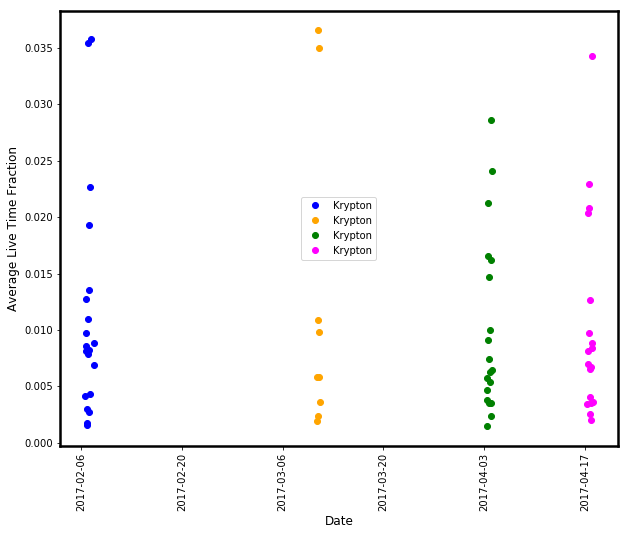

In [102]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Krypton':
        for t_index, date in enumerate(kr_cal_dates[:-1]):
            print(kr_cal_dates[t_index], kr_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


26 Feb 16


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in multiply
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in true_divide


1187321
9 Mar 16
9 Mar 170310_1215
1058963
2 April 19


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in true_divide


1413690
21 Feb 17
1352916
12 Feb 15
1115570
5 Mar 15
1112301
16 April 18
1269130
5 Feb 29
2808031


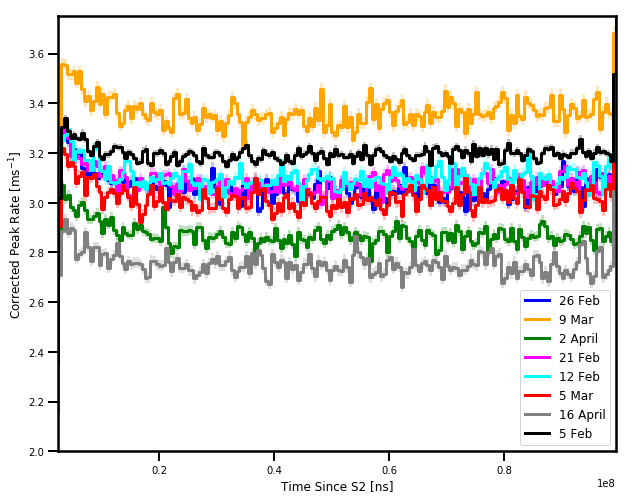

In [108]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_kr_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([2, 3.75])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

1.) Peak rate related to event rate seems to be true in Kr data, though 6th injection (Cal 5), is an outlier. Problematic. Decrease trend aslo not consistent with Rb83 half life

### Split by Date of Rn Datasets

In [22]:
%%time

rn_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), 
              datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1)]

print('Load Data')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

date_label=["13 Mar", "9 May", "12 Jun", "10 Jul", "7 Aug"]

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_rn_calibrations={}
for t_index, date in enumerate(rn_cal_dates[:-1]):
    df=datasets_rn
    df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_rn_calibrations[date_label[t_index]]=dict_calibration

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
  6%|▋         | 217/3456 [00:00<00:01, 1995.71it/s]

Load Data
Found 3456 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 309 rows removed (10.43% passed)


 10%|█         | 351/3456 [00:00<00:00, 3509.25it/s]

TimeCut Low selection: 36 rows removed (89.57% passed)
TimeCut High selection: 250 rows removed (19.09% passed)


 10%|▉         | 332/3456 [00:00<00:00, 3314.72it/s]

TimeCut Low selection: 95 rows removed (72.46% passed)
TimeCut High selection: 182 rows removed (27.20% passed)


 10%|▉         | 338/3456 [00:00<00:00, 3210.84it/s]

TimeCut Low selection: 163 rows removed (52.75% passed)
TimeCut High selection: 156 rows removed (14.29% passed)


  9%|▊         | 299/3456 [00:00<00:01, 2979.84it/s]

TimeCut Low selection: 189 rows removed (45.22% passed)
TimeCut High selection: 92 rows removed (41.03% passed)


100%|██████████| 3456/3456 [00:02<00:00, 1670.89it/s]

CPU times: user 6.35 s, sys: 1.94 s, total: 8.29 s
Wall time: 22.9 s


2017-01-17 2017-04-01
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 164 rows removed (18.00% passed)
2017-03-13 18:17:43
2017-04-01 2017-06-01
TimeCut Low selection: 36 rows removed (82.00% passed)
TimeCut High selection: 105 rows removed (35.98% passed)
2017-05-09 18:03:18
2017-06-01 2017-07-01
TimeCut Low selection: 95 rows removed (52.50% passed)
TimeCut High selection: 37 rows removed (64.76% passed)
2017-06-12 16:29:15
2017-07-01 2017-08-01
TimeCut Low selection: 163 rows removed (18.50% passed)
TimeCut High selection: 11 rows removed (70.27% passed)
2017-07-10 17:47:37
2017-08-01 2017-09-01
TimeCut Low selection: 189 rows removed (5.50% passed)
TimeCut High selection: 0 rows removed (100.00% passed)
2017-08-07 19:28:39


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


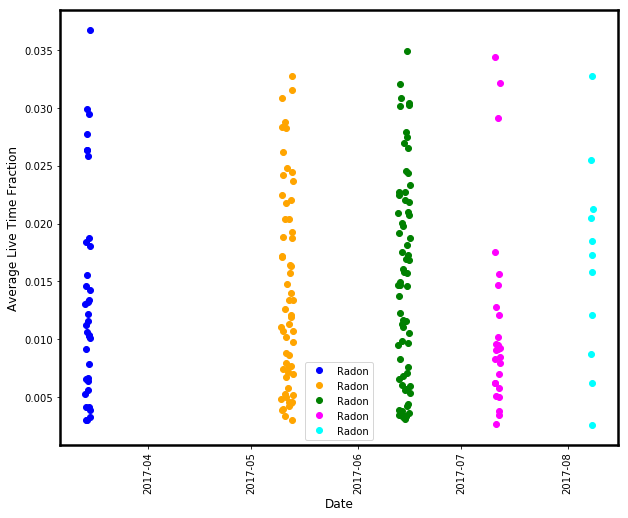

In [19]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Radon':
        for t_index, date in enumerate(rn_cal_dates[:-1]):
            print(rn_cal_dates[t_index], rn_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
            print(df_temp.iloc[0].start)
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


10 Jul 26
1933950
13 Mar 36
1913272
9 May 59
2885440
12 Jun 68
3725256
7 Aug 11
1012197


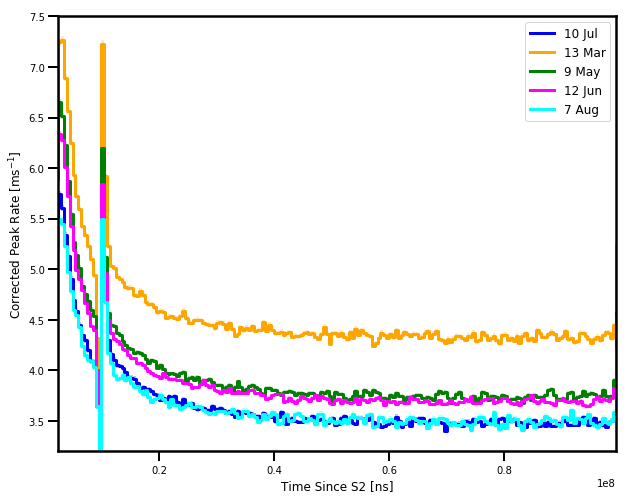

In [23]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_rn_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([3.2, 7.5])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Rn data also shows decreasing trend in peak rate. But why though? This would not be expected, as Th228 does not decay over months timescale, and increasing e-lifetime should lead to higher not lower single electron rate.

Look at Bkg data. De-couples "opening the valve" effect.

### Split Bkg data by Date

In [24]:
%%time

bkg_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 3, 1), datetime.date(2017, 4, 1), 
              datetime.date(2017, 5, 1), datetime.date(2017, 6, 1), datetime.date(2017, 7, 1)]

print('Load Data')
simpath= '/project/lgrandi/jpienaar/cache_files/'
#simpath= '/scratch/midway2/jpienaar/cache_files/'

date_label=['Feb', 'Mar', 'Apr', 'May', 'Jun']

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_bkg_calibrations={}
for t_index, date in enumerate(bkg_cal_dates[:-1]):
    df=datasets_bkg
    df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_bkg_calibrations[date_label[t_index]]=dict_calibration

Load Data


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 11%|█         | 372/3478 [00:00<00:00, 3714.78it/s]

Found 3478 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 5965 rows removed (6.64% passed)


  9%|▉         | 315/3478 [00:00<00:01, 3141.83it/s]

TimeCut Low selection: 424 rows removed (93.36% passed)
TimeCut High selection: 5752 rows removed (3.57% passed)


  7%|▋         | 236/3478 [00:00<00:01, 2356.30it/s]

TimeCut Low selection: 637 rows removed (90.03% passed)
TimeCut High selection: 5132 rows removed (10.78% passed)


  7%|▋         | 242/3478 [00:00<00:01, 2411.08it/s]

TimeCut Low selection: 1257 rows removed (80.33% passed)
TimeCut High selection: 4728 rows removed (7.87% passed)


 12%|█▏        | 433/3478 [00:00<00:00, 4324.23it/s]

TimeCut Low selection: 1661 rows removed (74.00% passed)
TimeCut High selection: 4380 rows removed (7.36% passed)


100%|██████████| 3478/3478 [00:55<00:00, 62.46it/s]  

CPU times: user 20.5 s, sys: 31.8 s, total: 52.3 s
Wall time: 5min 30s


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


2017-01-17 2017-03-01
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 1545 rows removed (21.53% passed)
2017-03-01 2017-04-01
TimeCut Low selection: 424 rows removed (78.47% passed)
TimeCut High selection: 1332 rows removed (13.79% passed)
2017-04-01 2017-05-01
TimeCut Low selection: 637 rows removed (67.65% passed)
TimeCut High selection: 729 rows removed (45.27% passed)
2017-05-01 2017-06-01
TimeCut Low selection: 1240 rows removed (37.02% passed)
TimeCut High selection: 325 rows removed (55.42% passed)
2017-06-01 2017-07-01
TimeCut Low selection: 1644 rows removed (16.51% passed)
TimeCut High selection: 0 rows removed (100.00% passed)


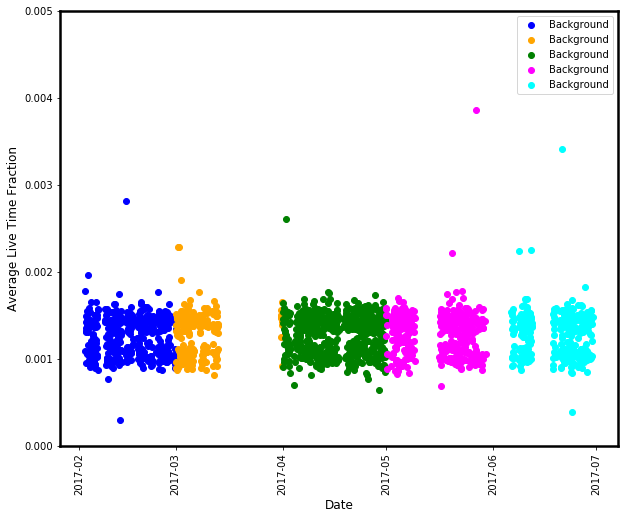

In [25]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Background':
        for t_index, date in enumerate(bkg_cal_dates[:-1]):
            print(bkg_cal_dates[t_index], bkg_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 1), datetime.date(2017, 3, 1)])
plt.ylim([0, 0.005])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


Mar 213


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in multiply
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide


933914
Jun 325
Jun 170620_2215
Jun 170620_2315
1093421
Feb 424
Feb 170209_0611
Feb 170209_0812
1687568
Apr 603
Apr 170411_2114
2232675
May 404
1784090


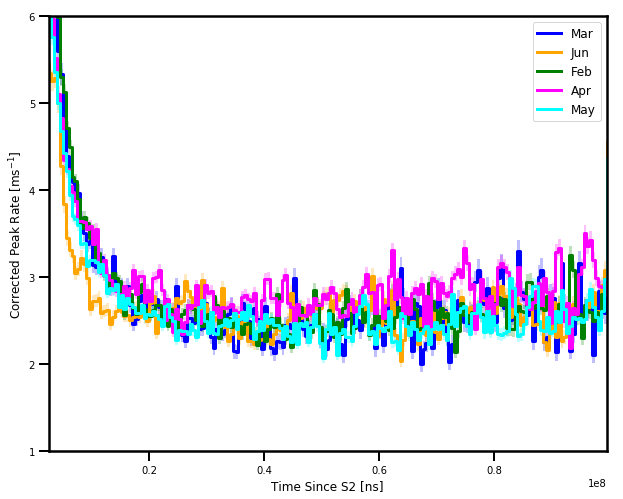

In [26]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_bkg_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([1.0, 6])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

From background seems different "rates" between different radon and krypton calibrations much more likely to be correlated to different "valve" conditions than enything else

### Two-D plots. No Cuts

Todo: Normalize next 3 cells by number of S2s of given size 
 * Not needed, livetime should take care of that already 

Krypton 63


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in double_scalars


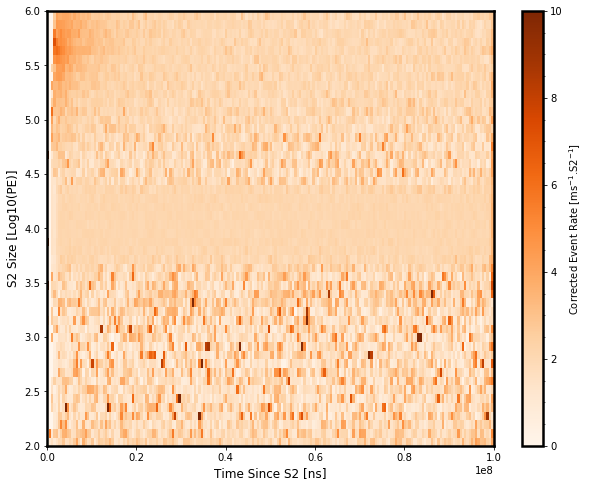

Radon 200


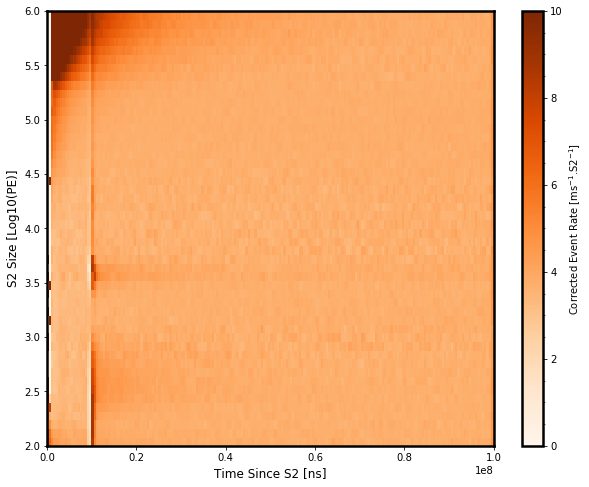

Background 1969


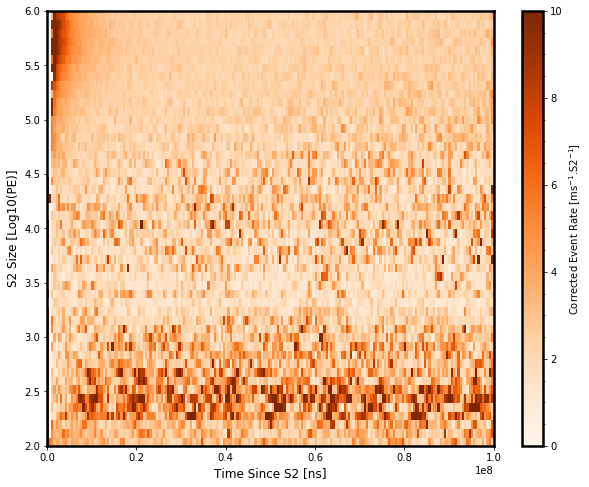

In [54]:
##Live Time Corrected 2d Plots##
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
plt.set_cmap("Oranges")

_s2bins=50
_tbins=200
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))
    plt.figure(figsize=(10, 8))
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            livet_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            livet_hist=data['livet_hist']
            events=data['events']
    
   
    s2_norm_hist=events_hist.sum('delta_T')
    
    blank_hist=events_hist.similar_blank_histogram()
        
    for idt in range(_tbins):
        for ids2 in range (_s2bins):
            #blank_hist[idt][ids2]=
            bin_content=events_hist[idt][ids2]/livet_hist[idt][ids2]
            if np.isnan(bin_content):
                blank_hist[idt][ids2]=0
            else:
                blank_hist[idt][ids2]=bin_content
    
    blank_hist=blank_hist*10**6 #ms adjustment
    blank_hist.plot(cblabel = 'Corrected Event Rate [ms$^{-1}$.S2$^{-1}$]', vmax=1*10**1, vmin =0)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate_corrected.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate_corrected.pdf" %source, bboxes='tight')
    plt.show()    

    
   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


Krypton


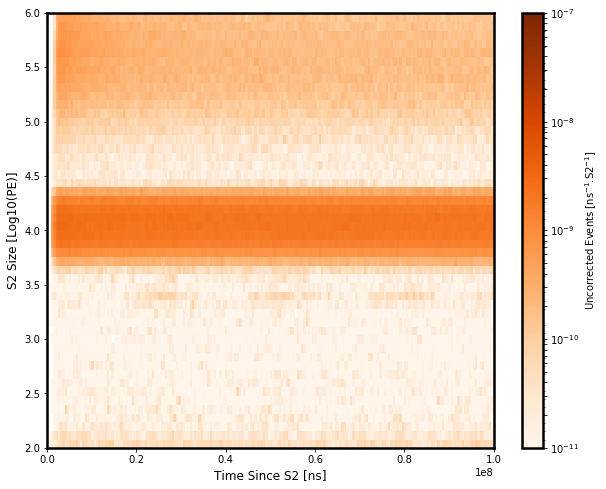

Radon


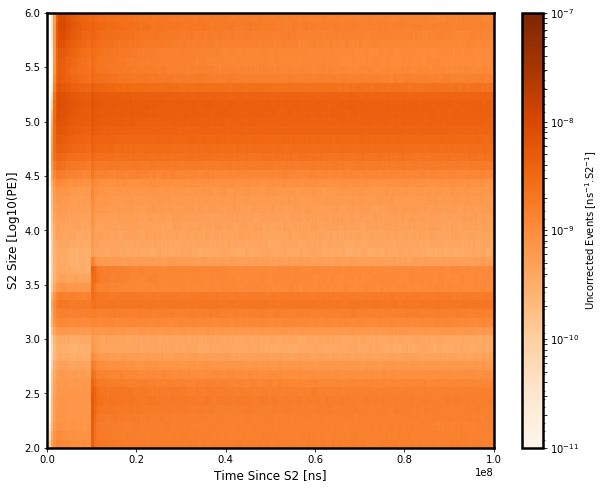

Background


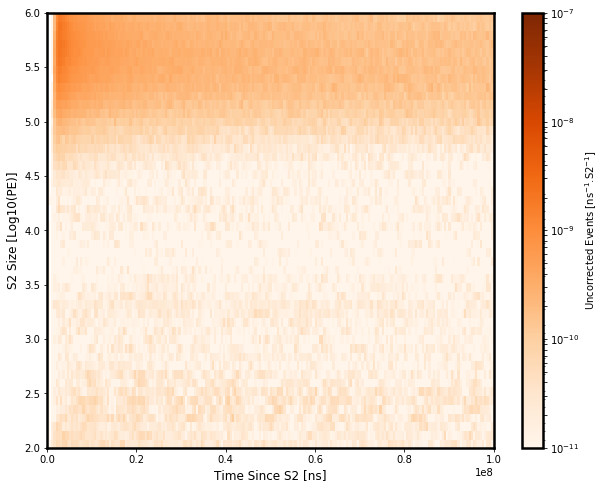

In [24]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


Krypton


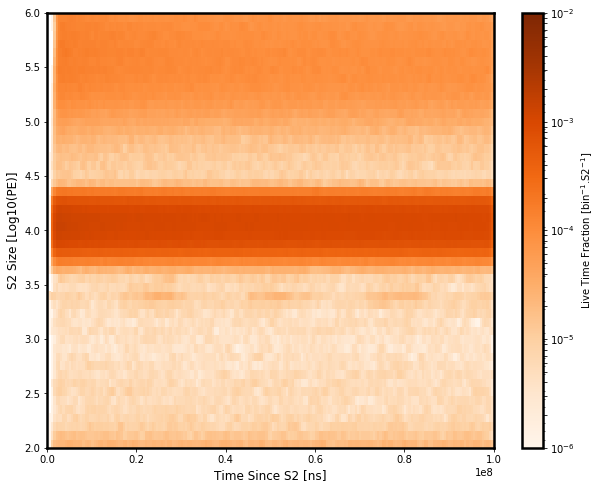

Radon


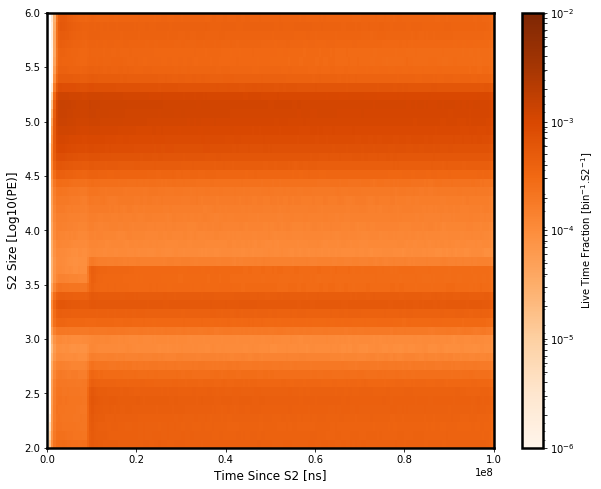

Background


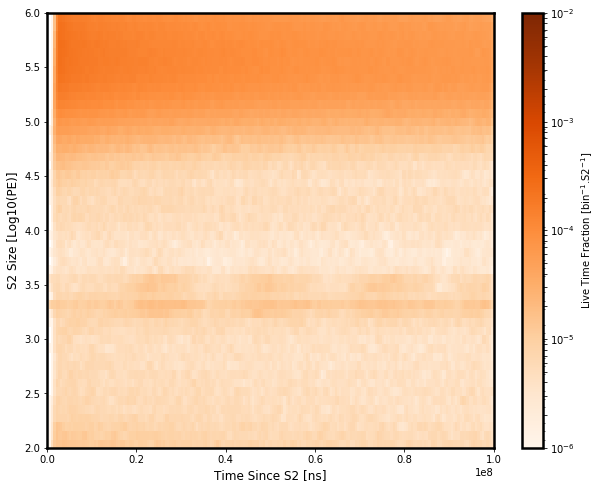

In [25]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Live Time Fraction [bin$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-6, vmax=10**-2)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_livetime.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_livetime.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


Krypton


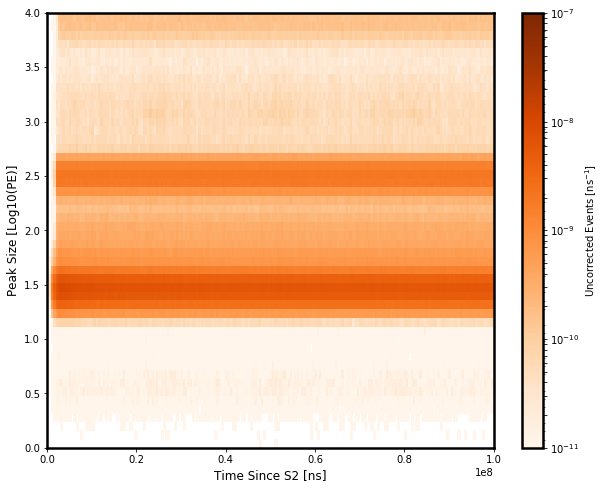

Radon


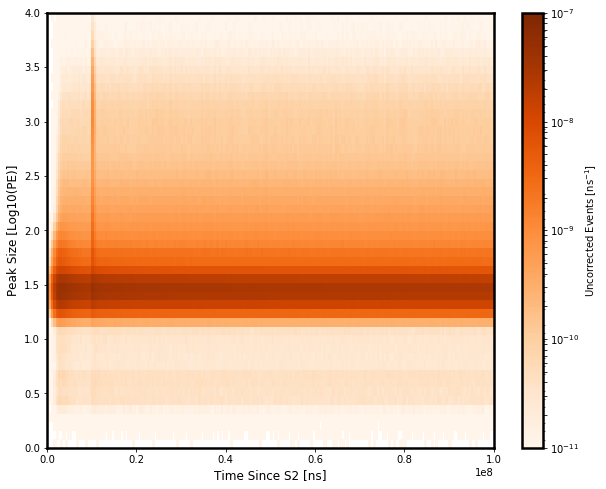

Background


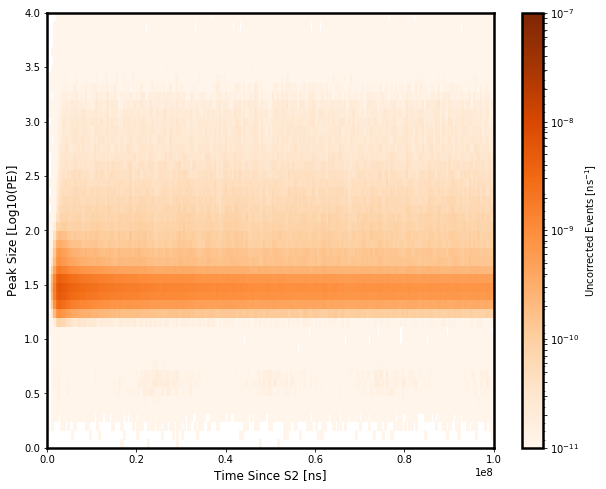

In [26]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
peaks_hist=0
events=0
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del peaks_hist
    events=0
    for key, data in dict_data.items():
        try:
            peaks_hist
            peaks_hist+=data['peaks']
            events+=data['events']
        except NameError:
            peaks_hist=data['peaks']
            events=data['events']
    
    new_hist=peaks_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$]' ,norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('Peak Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_peaks.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_peaks.pdf" %source, bboxes='tight')
    plt.show()    

   


### Looking at energy lines

Krypton
3360928
Background
2479736
Radon
2195232
Krypton
9365815
Background
6006306
Radon
11470115


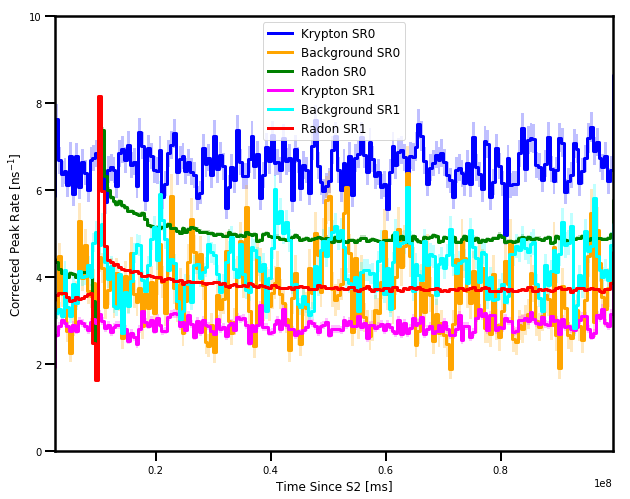

In [34]:
#Plots corrected event with error added#

colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
#[5.3, 6]
#[3, 3.7]
#[4.5, 5.2]
#[2, 2.7]

lower_cs2=2
upper_cs2=3

plt.figure(figsize=(10, 8))

index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([0, 10])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Radon SR1 seems consistely off. Only first calibration injection is very high. Does exluding this move Radon SR1 closer to other datasets?

### Excluding First SR1 Radon Injection

In [21]:
%%time

rn_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), 
              datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1)]

print('Load Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

df=datasets_rn
df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[1], 'TimeCut Low')
dataset_names=df_temp['name']
dict_calibration={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names.isin([dataset[:-7]]).any():
         with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dict_calibration[key]=data_dict


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
  0%|          | 0/3262 [00:00<?, ?it/s]

Load Data
Found 3262 datasets
TimeCut Low selection: 36 rows removed (89.57% passed)


100%|██████████| 3262/3262 [00:19<00:00, 167.61it/s] 

CPU times: user 2.38 s, sys: 2.4 s, total: 4.77 s
Wall time: 19.6 s


In [26]:
dict_source_sr1={'Radon' : dicts_datasets_rn, 'Krypton': dicts_datasets_kr, 
                 'Background' : dicts_datasets_bkg, 'Reduced Radon': dict_calibration}
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))

Background 1969
Krypton 67
Radon 200
Reduced Radon 164


Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in multiply
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in true_divide


2479736
Krypton
792268
Radon


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in true_divide


614827
Background
6006306
Krypton
2304586
Radon
11470115
Reduced Radon
9556843


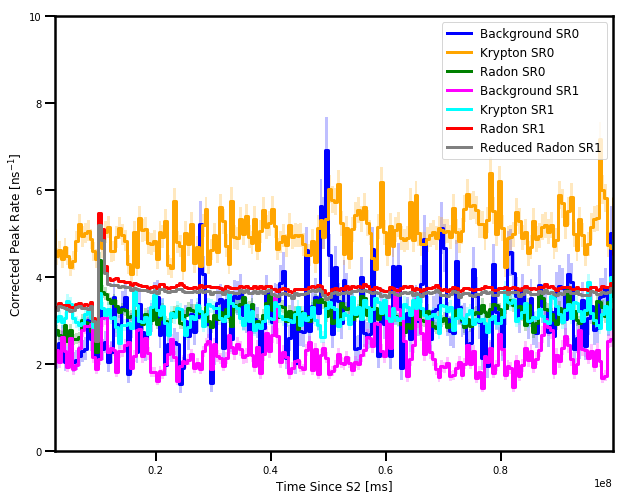

In [28]:
#Plots corrected event with error added#

colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
#[5.3, 6]
#[3, 3.7]
#[4.5, 5.2]
#[2, 2.7]

lower_cs2=3
upper_cs2=3.7

plt.figure(figsize=(10, 8))

index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([0, 10])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Position Correlation Stuff

In [48]:
## Load random Sampled (Generated at end of notebook if needed)

with open('random_source_sampling.pkl', 'rb') as handle:
    dfs_source_distrib_hist = pickle.load(handle)

Background 901


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


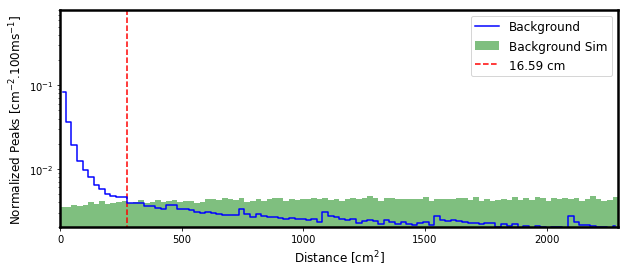

Krypton 50


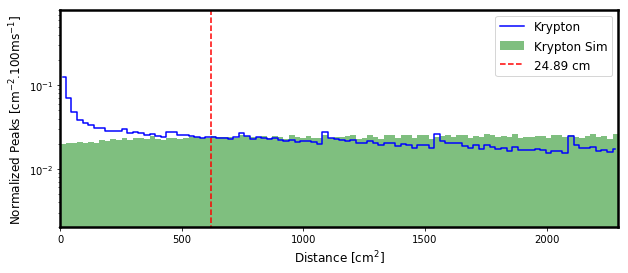

Radon 53


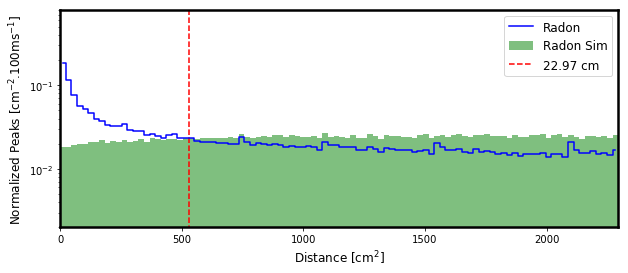

In [50]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=2*10**-3
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
for source, dict_data in dict_source_sr0.items():
    plt.figure(figsize=(10, 4))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_r2']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_r2']
            events=data['events']
      
    new_hist=r2_hist
    new_hist=new_hist/events
    new_hist=new_hist.sum('delta_T')
    new_hist.plot(label=source, color='blue')
    
    random_comp = dfs_source_distrib_hist[source]['alpha']
    r_norms = dfs_source_distrib_hist[source]['r_norms']

    content, bins = np.histogram(random_comp[:, 0]**2, weights=1/r_norms, bins=100, range=[0, (R_tpc)**2])
    scaling_factor=np.sum(new_hist[:])/np.sum(content)
    plt.hist(random_comp[:, 0]**2, weights=scaling_factor/r_norms, range=[0, (R_tpc)**2], bins=100, 
             histtype='stepfilled', linewidth=2, label='%s Sim' %source, color='green', alpha=0.5)
    #print(np.nansum(random_comp[:,0]**2/r_norms))
    
    
    #event_max=np.max(new_hist)
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")
   
    idx=1
    for bin_value in new_hist[1:]:
        if bin_value<(content[idx]*scaling_factor):
            plt.vlines(_rpoints[idx], 0, _ymax, color='red', 
                       linestyle="dashed", label='%.2f cm' %float(np.sqrt(_rpoints[idx])))
            break
        idx+=1
    
    plt.xlim([0, _xmax])
    plt.ylim([_ymin, _ymax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.100ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


In [52]:
#t_bins=[0, 5*10**8, 2*10**9]
livet_tbin_width=0.5*10**6
t_bins=np.linspace(0, 1.5*10**8, 7)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source_sr0.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            livet_hist+=data['livet_hist']  
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            livet_hist = data['livet_hist']  
            events = data['events']
 
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):      
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = np.floor(start_time/(livet_tbin_width))
        stop_bin  = np.floor(stop_time/(livet_tbin_width))
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        
        
        new_hist=new_hist/livet_correction
        new_hist.plot(label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
                    

    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm2]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([4*10**-1, 3*10])
    plt.yscale('log')
    plt.savefig("fig_%s_r_dep_timeslices.png" %source, bboxes='tight')
    plt.savefig("fig_%s_r_dep_timeslices.pdf" %source, bboxes='tight')
    plt.show()


Background


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
t_bins=np.linspace(0, 1*10**8, 5)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            livet_hist+=data['livet_hist']  
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            livet_hist = data['livet_hist']  
            events = data['events']
 
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):
        #Time Slice Hist
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = np.floor(start_time/(livet_tbin_width))
        stop_bin  = np.floor(stop_time/(livet_tbin_width))
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        
        
        new_hist=new_hist/livet_correction
        
        #Reference time window hist
        ref_start_time=t_bins[-2]
        ref_stop_time=t_bins[-1]
        #print(ref_start_time, ref_stop_time)
        ref_hist=dt_r2_hist.slicesum(start=ref_start_time, stop=ref_stop_time,axis='delta_T')
        
        #Livetime in reference slice
        ref_start_bin = np.floor(ref_start_time/(livet_tbin_width))
        ref_stop_bin  = np.floor(ref_stop_time/(livet_tbin_width))
        ref_livet_correction = np.average(livet_hist[ref_start_bin:ref_stop_bin])
        #print(ref_start_bin, ref_stop_bin, ref_livet_correction)  
        ref_hist=ref_hist/ref_livet_correction

        #Difference Hist
        diff_hist=(new_hist-ref_hist)/ref_hist
        diff_hist.plot(label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
             
        #const_std=np.std(diff_hist[25:75])
        #const_ave=np.average(diff_hist[25:75])
        plt.hlines(0, 0, _xmax, color='r', linestyle=":")
        #plt.fill_between(r_bins, [const_ave-const_std]*len(r_bins), [const_ave+const_std]*len(r_bins),alpha=0.25,facecolor=colours[index])
        #print(const_std, )
        
        
        #new_hist.plot(label=index)
    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Relative Difference', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([-0.35, 1])
    #plt.yscale('log')
    plt.savefig("fig_%s_r_diff_timeslices.png" %source, bboxes='tight')
    plt.savefig("fig_%s_r_diff_timeslices.pdf" %source, bboxes='tight')
    plt.show()


### X/Y Slixes

In [ ]:
_spatial_bins=50
_xbins=np.linspace(-50, 50, _spatial_bins+1)
_ybins=np.linspace(-50, 50, _spatial_bins+1)
xv, yv = np.meshgrid(_xbins, _ybins)
array_hist = np.zeros((_spatial_bins, _spatial_bins))
xc = np.zeros_like(array_hist)
yc = np.zeros_like(array_hist)

r_lower=15
r_upper=20
key_search=[]

for idx, x_edge in tqdm(enumerate(xv[:-1])):
    for idy, y_edge in enumerate(yv[:-1]):
        xc[idx, idy]=xv[idx][idy]+(xv[idx][idy+1]-xv[idx][idy])/2
        yc[idx, idy]=yv[idx][idy]+(yv[idx+1][idy]-yv[idx][idy])/2
        
        rc = np.sqrt(xc[idx, idy]**2+yc[idx, idy]**2)
        
        if rc>r_lower and rc<r_upper:
            key_search.append('%d_%d' %(xc[idx, idy], yc[idx, idy]))

In [ ]:
%%time
print('Data')
#simpath= '/scratch/midway2/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*xy.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn_xy={}
dicts_datasets_kr_xy={}
dicts_datasets_bkg_xy={}
for dataset in tqdm(datasets[:]):
    #print(key)
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        #print('Radon')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_rn_xy[key]=xy_hist
        del data_dict
            
    if dataset_names_kr.isin([dataset[:-7]]).any():
        #print('Krypton')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_kr_xy[key]=xy_hist
        del data_dict
            
    if dataset_names_bkg.isin([dataset[:-7]]).any():
        #print('Bkg')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_bkg_xy[key]=xy_hist
        del data_dict
  
#df_PI=pd.concat(df_PI)

In [ ]:
dict_source_xy={'Radon' : dicts_datasets_rn_xy, 'Krypton': dicts_datasets_kr_xy, 'Background' : dicts_datasets_bkg_xy}

In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
t_bins=np.linspace(0, 2*10**8, 5)
for source, dict_data in dict_source_xy.items():
    numrows=1
    numcols=len(t_bins)-2
    plt.figure(figsize=(10*numcols, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    for index, delta_t in enumerate(t_bins[::2]):
        plt.subplot2grid((numrows,numcols), (0, index))
        ax = plt.gca()
        circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        
        slice_hist=new_hist.slicesum(start=t_bins[index], stop=t_bins[index+1],axis='delta_T')
        slice_hist.plot(norm=LogNorm(), cblabel='Normalized Entries', vmin=5*10**-11, vmax=5*10**-9)
        plt.xlabel('X  [cm]', fontsize=12)
        plt.ylabel('Y  [cm]', fontsize=12)


    plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


In [ ]:
numcols
np.floor(len(t_bins)/2)

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
for source, dict_data in dict_source_xy.items():
    plt.figure(figsize=(10, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    ax = plt.gca()
    circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    
    new_hist=new_hist.slicesum(start=1*10**8, stop=2*10**8,axis='delta_T')
    print(np.average(new_hist))
    new_hist.plot(label=source, norm=LogNorm())
    index+=1

#plt.xlim([0, _xmax])
#plt.ylim([_ymin, _ymax])
    plt.xlabel('X  [cm]', fontsize=12)
    plt.ylabel('Y  [cm]', fontsize=12)
#plt.legend(loc='best', fontsize=12)
#plt.yscale('log')
    #plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    #plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


### Testing R normalization

In [31]:
#Uniform Distrib
coords=np.random.random([100000, 2])
new_array=[]
closed_array=[]
open_array=[]
alpha_array=[]
r_norms=[]
s2_ypos=20
s2_xpos=-23
rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
for pos in coords:
    xpos=R_tpc*(2*pos[0]-1)
    ypos=R_tpc*(2*pos[1]-1)
    if (ypos**2+xpos**2)>R_tpc**2:
        continue
    else:
        xpos=R_tpc*(2*pos[0]-1)
        ypos=R_tpc*(2*pos[1]-1)
        new_array.append([xpos, ypos])
        
        r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
        alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
        r_norm = (alpha/np.pi)
        if np.isnan(alpha):
            alpha=-1
            r_norm=1
            closed_array.append([xpos, ypos])
        elif alpha>0.5*np.pi:
            open_array.append([xpos, ypos])
        new_array.append([xpos, ypos])
        alpha_array.append([r_dist, alpha])
        r_norms.append(r_norm)
        
      

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in arccos


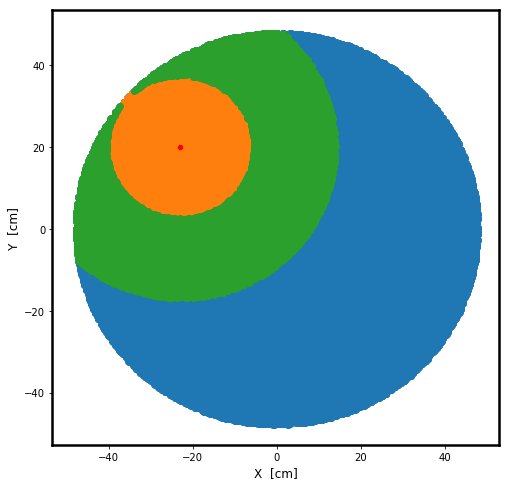

In [34]:
plt.figure(figsize=(8, 8))
new_array=np.array(new_array)
closed_array=np.array(closed_array)
open_array=np.array(open_array)
plt.scatter(new_array[:, 0], new_array[:, 1])
plt.scatter(closed_array[:, 0], closed_array[:, 1])
plt.scatter(open_array[:, 0], open_array[:, 1])
plt.scatter(s2_xpos, s2_ypos, color='r', s=20)
plt.xlabel('X  [cm]', fontsize=12)
plt.ylabel('Y  [cm]', fontsize=12)
#plt.savefig('fig_r_norm_illustration.png')

### Load Data and Random Sample

In [35]:
%%time
#Load Data To Sample From

print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*Pre_trigger.hdf5', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

datasets_rn=[]
datasets_kr=[]
datasets_bkg=[]
for dataset in tqdm(datasets[:]):
    run_number=dataset[:-17]
    if dataset_names_rn.isin([run_number]).any():
        while len(datasets_rn)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_rn.append(df)
            
    elif dataset_names_bkg.isin([run_number]).any():
        while len(datasets_bkg)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_bkg.append(df)
            
    elif dataset_names_kr.isin([run_number]).any():
        while len(datasets_kr)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_kr.append(df)
              
    
datasets_rn=pd.concat(datasets_rn)
datasets_kr=pd.concat(datasets_kr)
datasets_bkg=pd.concat(datasets_bkg)

  2%|▏         | 70/3547 [00:00<00:04, 697.50it/s]

Radon Data
Found 3547 datasets


 28%|██▊       | 1000/3547 [00:01<00:03, 749.79it/s]/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/minitrees.py:585: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history
100%|██████████| 3547/3547 [00:15<00:00, 229.38it/s]


CPU times: user 12.4 s, sys: 6.04 s, total: 18.4 s
Wall time: 22.5 s


In [36]:
dfs_source_distrib={'Background': {'data':datasets_bkg},
                    'Radon': {'data': datasets_rn},
                    'Krypton': {'data': datasets_kr}}

In [40]:
#Distrib from Data
dfs_source_distrib_hist={}
sample_num=1000
for key, source in dfs_source_distrib.items():
    print(key)
    df=source['data']
    alpha_array=[]
    new_array=[]
    r_norms=[]
    unique_y=pd.unique(df['y_s2_tpf'].values)
    unique_x=pd.unique(df['x_s2_tpf'].values)
    unique_events=[[x, y] for x, y in zip(unique_x, unique_y)]
    sampled_df=df.filter(['x_p_tpf','y_p_tpf'])
    sampled_df=sampled_df.sample(sample_num)
    for unique_s2 in tqdm(unique_events[:sample_num]):
        s2_ypos=unique_s2[1]
        s2_xpos=unique_s2[0]
        rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
        for peak_key, peak in sampled_df.iterrows():
            xpos=peak['x_p_tpf']
            ypos=peak['y_p_tpf']
            new_array.append([xpos, ypos])

            r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
            alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
            r_norm = (alpha/np.pi)
            if np.isnan(alpha):
                alpha=-1
                r_norm=1
            alpha_array.append([r_dist, alpha])
            r_norms.append(r_norm)

    alpha_array=np.array(alpha_array)
    r_norms=np.array(r_norms)
    dfs_source_distrib_hist[key]={'alpha': alpha_array, 'r_norms': r_norms}

  0%|          | 1/399 [00:00<00:46,  8.56it/s]

Background


100%|██████████| 399/399 [00:38<00:00, 10.43it/s]


Krypton


100%|██████████| 401/401 [00:38<00:00, 10.37it/s]


Radon


100%|██████████| 401/401 [00:38<00:00, 10.51it/s]


Background 399000 399000
Krypton 401000 401000
Radon 401000 401000


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


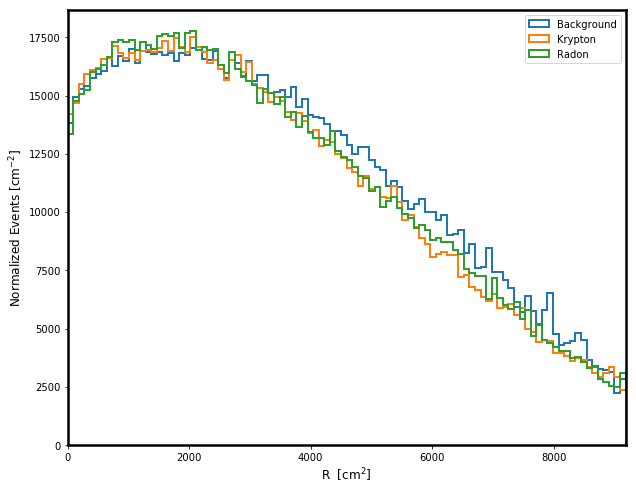

In [44]:
plt.figure(figsize=(10, 8))
for key, source in dfs_source_distrib_hist.items():
    alpha_array=source['alpha']
    r_norms=source['r_norms']
    print(key,len(alpha_array), len(r_norms))
    plt.hist(alpha_array[:, 0]**2, weights=1/r_norms, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2, label=key)
    #plt.vlines((R_tpc-rpos)**2, 0, 5000)
    #plt.vlines((R_tpc+rpos)**2, 0, 5000)
#plt.yscale('log')
plt.xlim([0, (2*R_tpc)**2])
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
plt.legend(loc='best')
#plt.savefig('fig_r2_norm_illustration_weighted.png')
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


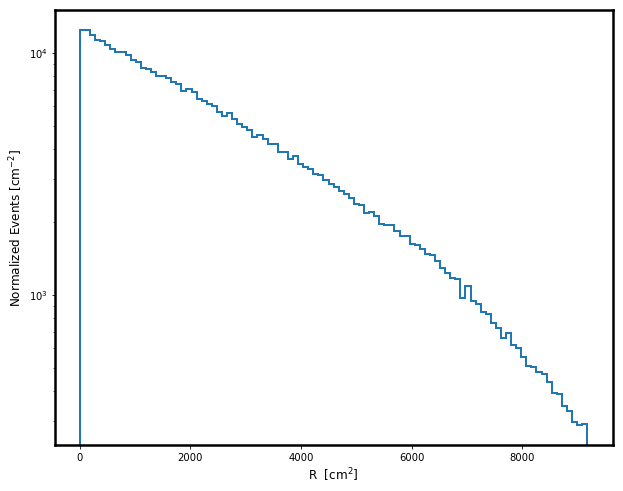

In [42]:
plt.figure(figsize=(10, 8))
plt.hist(alpha_array[:, 0]**2, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2)
#plt.vlines((R_tpc-rpos)**2, 0, 5000)
#plt.vlines((R_tpc+rpos)**2, 0, 5000)
#plt.ylim([0, 5000])
plt.yscale('log')
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
#plt.savefig('fig_r2_norm_illustration.png')

plt.show()

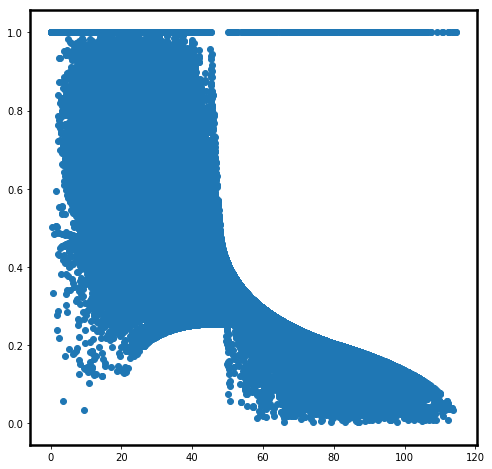

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(alpha_array[:, 0], r_norms)

In [47]:
with open('random_source_sampling.pkl', 'wb') as handle:
    pickle.dump(dfs_source_distrib_hist, handle, protocol=pickle.HIGHEST_PROTOCOL)